# Exercise: Climate

#### Summary

Do nothing very useful with climate data from the US government.

#### Data Source(s)

Data from NOAA, https://www7.ncdc.noaa.gov/CDO/CDODivisionalSelect.jsp

#### Files

- CDODiv8449537379627.txt, climate data from 1985-2017
- florida.txt, california.txt, virginia.txt, minnesota.txt, nebraska.txt, same as above but for specific states

#### Data dictionary

- **PCP** - Precipitation Index
- **TAVG** - Temperature Index
- **TMIN** - Minimum Temperature Index
- **TMAX** - Maximum Temperature Index
- **PDSI** - Palmer Drought Severity Index
- **PHDI** - Palmer Hydrological Drought Index
- **ZNDX** - Palmer Z-Index
- **PMDI** - Modified Palmer Drought Severity Index
- **CDD** - Cooling Degree Days
- **HDD** - Heating Degree Days
- **SPnn** - Standard Precipitation Index

#### Skills

- Cleaning column names
- NaN values
- Date time manipulation
- Plotting

# Reading in your data

## Open up the file and check the first few rows

In [1]:
import pandas as pd
import re
%matplotlib inline
df = pd.read_csv('data/climate/CDODiv8449537379627.txt')

## Hmmm, `-99.99` doesn't seem like good data!

And if you read [the documentation](ftp://ftp.ncdc.noaa.gov/pub/data/cirs/climdiv/divisional-readme.txt), you find out it means MISSING DATA. Get rid of those -99.99s however you think is best.

In [2]:
df.head()


,StateCode,Division,YearMonth,PCP,TAVG,PDSI,PHDI,ZNDX,PMDI,CDD,...,SP01,SP02,SP03,SP06,SP09,SP12,SP24,TMIN,TMAX,Unnamed: 20
0,110,0,189501,3.32,26.69,1.47,1.47,4.42,1.47,6,...,1.79,-99.99,-99.99,-99.99,-99.99,-99.99,-99.99,16.52,36.86,NaN
1,110,0,189502,1.41,26.60,-0.45,0.87,-1.35,0.07,1,...,-1.69,0.52,-99.99,-99.99,-99.99,-99.99,-99.99,15.57,37.65,NaN
2,110,0,189503,1.99,39.97,-0.83,-0.83,-1.28,-0.83,13,...,-1.09,-2.11,-0.16,-99.99,-99.99,-99.99,-99.99,27.86,52.07,NaN
3,110,0,189504,1.99,52.90,-1.42,-1.42,-2.02,-1.42,27,...,-1.24,-1.62,-2.86,-99.99,-99.99,-99.99,-99.99,39.45,66.33,NaN
4,110,0,189505,2.88,59.94,0.04,-1.23,0.12,-1.08,88,...,-0.03,-0.78,-1.15,-99.99,-99.99,-99.99,-99.99,47.05,72.81,NaN


In [5]:
df.tail()

,StateCode,Division,YearMonth,PCP,TAVG,PDSI,PHDI,ZNDX,PMDI,CDD,...,SP01,SP02,SP03,SP06,SP09,SP12,SP24,TMIN,TMAX,Unnamed: 20
1460,110,0,201609,2.73,67.12,-0.07,1.45,0.02,0.78,216,...,0.54,1.78,1.61,1.05,0.83,2.41,2.05,54.84,79.41,NaN
1461,110,0,201610,2.39,57.72,-0.17,1.20,-0.32,0.42,82,...,0.34,0.52,1.41,0.75,1.01,2.05,2.08,45.54,69.89,NaN
1462,110,0,201611,1.75,47.95,-1.17,-1.17,-3.07,-1.17,23,...,-0.80,-0.32,-0.05,0.24,0.74,1.27,1.82,36.32,59.56,NaN
1463,110,0,201612,2.72,32.94,-1.39,-1.39,-1.02,-1.39,15,...,0.63,-0.13,0.04,0.81,0.69,0.62,1.69,23.25,42.64,NaN
1464,110,0,201701,3.22,33.55,-0.92,-0.92,0.99,-0.28,15,...,1.64,1.56,0.76,1.34,0.94,1.13,1.89,24.35,42.75,NaN


## Wait, there's even more missing data!

Open up [the documentation](ftp://ftp.ncdc.noaa.gov/pub/data/cirs/climdiv/divisional-readme.txt) and look for the other values that are "missing."

- Tip: don't read all of the documentation, use the power of searching!

In [18]:
df = pd.read_csv('data/climate/CDODiv8449537379627.txt', na_values=[-99.99, -9.99, -9.90, -9999])

In [19]:
df.tail()

,StateCode,Division,YearMonth,PCP,TAVG,PDSI,PHDI,ZNDX,PMDI,CDD,...,SP01,SP02,SP03,SP06,SP09,SP12,SP24,TMIN,TMAX,Unnamed: 20
1460,110,0,201609,2.73,67.12,-0.07,1.45,0.02,0.78,216,...,0.54,1.78,1.61,1.05,0.83,2.41,2.05,54.84,79.41,NaN
1461,110,0,201610,2.39,57.72,-0.17,1.20,-0.32,0.42,82,...,0.34,0.52,1.41,0.75,1.01,2.05,2.08,45.54,69.89,NaN
1462,110,0,201611,1.75,47.95,-1.17,-1.17,-3.07,-1.17,23,...,-0.80,-0.32,-0.05,0.24,0.74,1.27,1.82,36.32,59.56,NaN
1463,110,0,201612,2.72,32.94,-1.39,-1.39,-1.02,-1.39,15,...,0.63,-0.13,0.04,0.81,0.69,0.62,1.69,23.25,42.64,NaN
1464,110,0,201701,3.22,33.55,-0.92,-0.92,0.99,-0.28,15,...,1.64,1.56,0.76,1.34,0.94,1.13,1.89,24.35,42.75,NaN


## Confirm that you have 1465 rows and 21 columns

In [6]:
df.shape

(1465, 21)

## Let's see the columns and their data types

In [8]:
df.dtypes

StateCode        int64
Division         int64
YearMonth        int64
    PCP        float64
   TAVG        float64
   PDSI        float64
   PHDI        float64
   ZNDX        float64
   PMDI        float64
    CDD          int64
    HDD          int64
   SP01        float64
   SP02        float64
   SP03        float64
   SP06        float64
   SP09        float64
   SP12        float64
   SP24        float64
   TMIN        float64
   TMAX        float64
Unnamed: 20    float64
dtype: object

## Uuuuhhh something is weird

Try to get the average `TMAX`. It *probably* will not work. Why not?

In [9]:
df.TMAX.mean()

AttributeError: 'DataFrame' object has no attribute 'TMAX'

## Cleaning up

### Fix the column names!

Right now TMAX (and the rest of the column names) are looking pretty bad. Let's turn them into normal columns! **If you couldn't figure out what's wrong with them, ask!**

- Tip: You can get a list of the columns by using `df.columns`.
- Tip: You can actually treat them just like a pandas column
- Tip: What would you use if you had to remove whitespace (spaces) from the left and right of a column in pandas?
- Tip: Instead of using rename, you can set the columns to something new with `df.columns = blah blah blah` (but be sure to **check that your edited ones are right** before you assign them)

In [22]:
df.columns = df.columns.str.strip()

### Find the hottest months recorded

Just to make sure you cleaned it all up correctly - if you didn't clean the column titles, this won't work.

In [24]:
df.TMAX.sort_values(ascending=False).head()

498     90.84
474     90.55
78      89.96
1410    89.96
1338    89.58
Name: TMAX, dtype: float64

In [29]:
df.sort_values(by='TMAX', ascending=False).head()[['YearMonth', 'TMAX']]

,YearMonth,TMAX
498,193607,90.84
474,193407,90.55
78,190107,89.96
1410,201207,89.96
1338,200607,89.58


## That "Unnamed" column doesn't actually do anything. Delete it!

One of the things we talked about last class was **creating new dataframes** instead of editing our old ones. So we *could* do this:

```python
df = df[['col1', 'col2', 'col2', 'col3']]
```

**But don't do that!** I don't want you to type out all of those columns. I just want you to delete that column.

In [31]:
del(df['Unnamed: 20'])

## What is the `YearMonth` column?

What is its data type, and what is the content in it?

In [32]:
df.YearMonth.head(2)     #Its the date and an integer

0    189501
1    189502
Name: YearMonth, dtype: int64

## Convert `YearMonth` into a date (don't save it anywhere yet)

**Be sure to pass a `format=` to the converter.** It will work automatically, but it's better to get practice.

If you convert it correctly, it should look like...

    0      1895-01-01
    1      1895-02-01
    2      1895-03-01
    3      1895-04-01
    ...

In [ ]:
df.YearMonth.astype(str)

In [44]:
df['Date'] = pd.to_datetime((df.YearMonth).astype(str), format="%Y%m")

## Save this converted version into a new column called `Date`

### What is the datatype of the `Date` columns?

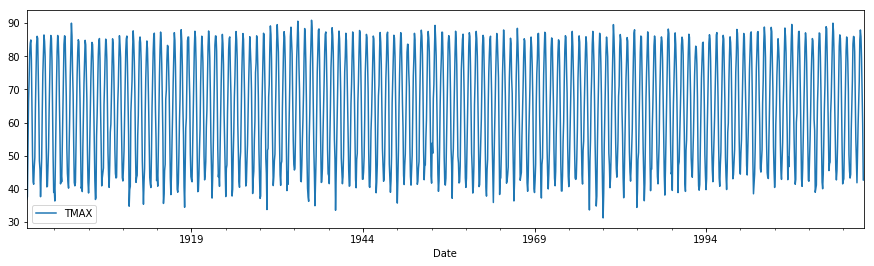

# Graphing

## Graph the maximum temperature over time using the old `YearMonth` column

Make it so wide it **extends across your entire screen**.

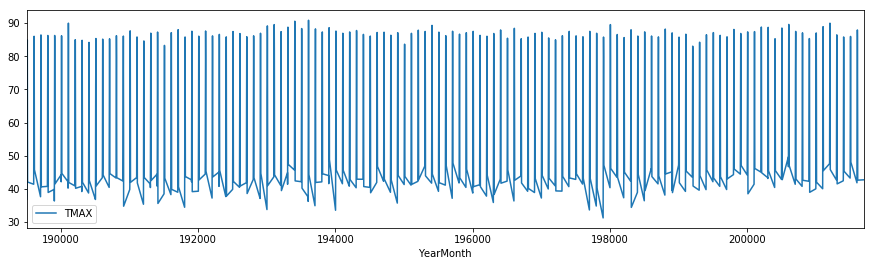

In [49]:
df.plot(x='YearMonth', y='TMAX', figsize=(15, 4))

## Graph the maximum temperature over time using the new `Date` column

Make it so wide it **extends across your entire screen**.

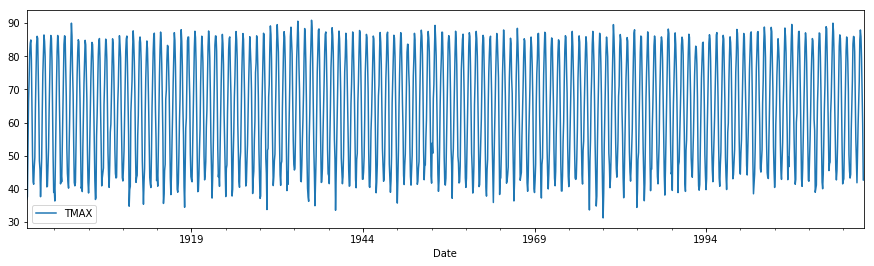

In [50]:
df.plot(x='Date', y='TMAX', figsize=(15, 4))

## How do they look different? Which one is better, and why?

In [ ]:
#the second because it has better numbers

# Resampling

Check that you have pandas 0.19.0 or newer by typing `pd.__version__`. If you have an earlier version, use `pip install -U pandas` to update.

In [ ]:
#ok

## View the average yearly temperature

**Don't use `.set_index` yet.** When using `resample`, you can also say `on='colname'` in order to say "resample using this column instead of using the index. Use that here.

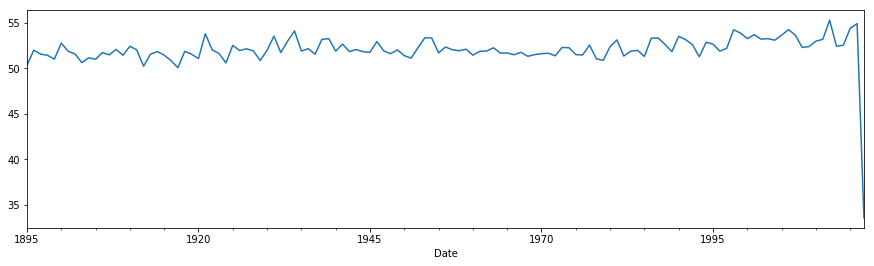

In [53]:
df.resample("A", on='Date')['TAVG']

## Graph the average annual temperature

Be sure ot make it **nice and wide**.

In [ ]:
df.resample("A", on='Date')['TAVG'].mean().plot(figsize =(15, 4))

## What's wrong with the right-hand side?

Use `.set_index` to get a datetime index and then examine the months in 1990 and the months in 2017 and see what's different about them.

In [54]:
df.set_index('Date', inplace =True)

In [56]:
df.head()

,StateCode,Division,YearMonth,PCP,TAVG,PDSI,PHDI,ZNDX,PMDI,CDD,HDD,SP01,SP02,SP03,SP06,SP09,SP12,SP24,TMIN,TMAX
Date,,,,,,,,,,,,,,,,,,,,
1895-01-01,110,0,189501,3.32,26.69,1.47,1.47,4.42,1.47,6,1017,1.79,NaN,NaN,NaN,NaN,NaN,NaN,16.52,36.86
1895-02-01,110,0,189502,1.41,26.60,-0.45,0.87,-1.35,0.07,1,974,-1.69,0.52,NaN,NaN,NaN,NaN,NaN,15.57,37.65
1895-03-01,110,0,189503,1.99,39.97,-0.83,-0.83,-1.28,-0.83,13,692,-1.09,-2.11,-0.16,NaN,NaN,NaN,NaN,27.86,52.07
1895-04-01,110,0,189504,1.99,52.90,-1.42,-1.42,-2.02,-1.42,27,345,-1.24,-1.62,-2.86,NaN,NaN,NaN,NaN,39.45,66.33
1895-05-01,110,0,189505,2.88,59.94,0.04,-1.23,0.12,-1.08,88,155,-0.03,-0.78,-1.15,NaN,NaN,NaN,NaN,47.05,72.81


## Upgrading to good data

**We can ignore 2017.** Edit our dataframe so it's only between the years of 1895 and 2016, and draw your graph again.

In [58]:
df = df['1895': '2016']

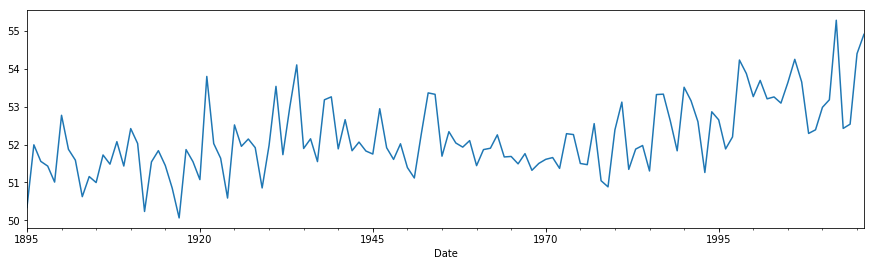

In [60]:
df.resample("A")['TAVG'].mean().plot(figsize =(15, 4))

### Maxes and mins

What years had the hottest maximum temperature? The hottest minimum temperature?

In [76]:
df.resample('A')['TMIN'].min().sort_values(ascending=True)

Date
1977-12-31    12.52
1979-12-31    12.58
1963-12-31    12.97
1918-12-31    13.28
1930-12-31    13.32
1940-12-31    14.09
1912-12-31    14.14
1936-12-31    14.20
1899-12-31    14.65
1937-12-31    14.74
1924-12-31    14.85
1982-12-31    15.12
1929-12-31    15.51
1895-12-31    15.57
1962-12-31    16.11
1949-12-31    16.12
1985-12-31    16.20
1904-12-31    16.34
1922-12-31    16.38
1966-12-31    16.39
1909-12-31    16.45
1983-12-31    16.52
1905-12-31    16.56
1989-12-31    16.57
1948-12-31    16.79
1978-12-31    16.86
1957-12-31    16.97
1970-12-31    17.04
1988-12-31    17.44
1917-12-31    17.55
              ...  
1974-12-31    21.31
2001-12-31    21.31
2010-12-31    21.31
2007-12-31    21.33
1987-12-31    21.36
1896-12-31    21.52
2015-12-31    21.58
1908-12-31    21.61
1952-12-31    21.70
1975-12-31    21.81
1980-12-31    21.85
1938-12-31    22.14
2003-12-31    22.24
1931-12-31    22.35
1906-12-31    22.37
1911-12-31    22.41
1934-12-31    22.46
2016-12-31    22.60
1992-12-31    2

In [72]:
df.resample('A')['TMAX'].max().sort_values().head()

Date
1992-12-31    83.03
1915-12-31    83.26
1950-12-31    83.62
1904-12-31    84.16
1993-12-31    84.22
Name: TMAX, dtype: float64

## Annual temperature cycles

Graph the average temperature cycle of a year, with january on the left and december on the right.

In [79]:
df.index.month

Int64Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10,
            ...
             3,  4,  5,  6,  7,  8,  9, 10, 11, 12],
           dtype='int64', name='Date', length=1464)

In [96]:
df['mon'] = df.index.month
df.head(20)

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,StateCode,Division,YearMonth,PCP,TAVG,PDSI,PHDI,ZNDX,PMDI,CDD,...,SP01,SP02,SP03,SP06,SP09,SP12,SP24,TMIN,TMAX,mon
Date,,,,,,,,,,,,,,,,,,,,,
1895-01-01,110,0,189501,3.32,26.69,1.47,1.47,4.42,1.47,6,...,1.79,NaN,NaN,NaN,NaN,NaN,NaN,16.52,36.86,1
1895-02-01,110,0,189502,1.41,26.60,-0.45,0.87,-1.35,0.07,1,...,-1.69,0.52,NaN,NaN,NaN,NaN,NaN,15.57,37.65,2
1895-03-01,110,0,189503,1.99,39.97,-0.83,-0.83,-1.28,-0.83,13,...,-1.09,-2.11,-0.16,NaN,NaN,NaN,NaN,27.86,52.07,3
1895-04-01,110,0,189504,1.99,52.90,-1.42,-1.42,-2.02,-1.42,27,...,-1.24,-1.62,-2.86,NaN,NaN,NaN,NaN,39.45,66.33,4
1895-05-01,110,0,189505,2.88,59.94,0.04,-1.23,0.12,-1.08,88,...,-0.03,-0.78,-1.15,NaN,NaN,NaN,NaN,47.05,72.81,5
1895-06-01,110,0,189506,2.95,67.80,0.20,-0.94,0.51,-0.43,225,...,-0.03,-0.06,-0.59,-0.58,NaN,NaN,NaN,54.72,80.89,6
1895-07-01,110,0,189507,3.00,71.24,0.78,0.78,1.78,0.78,256,...,0.56,0.27,0.13,-1.09,NaN,NaN,NaN,58.55,83.91,7
1895-08-01,110,0,189508,2.53,71.62,0.95,0.95,0.74,0.95,282,...,-0.21,0.15,0.10,-0.75,NaN,NaN,NaN,58.32,84.90,8
1895-09-01,110,0,189509,1.58,65.57,-0.89,-0.89,-2.68,-0.89,190,...,-1.94,-1.65,-1.04,-1.02,-0.95,NaN,NaN,52.38,78.73,9


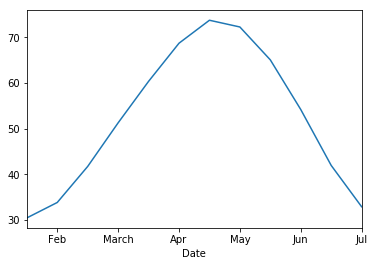

In [98]:
ax = df.groupby(by=df.index.month)['TAVG'].mean().plot()
# ax.xaxis.set_ticks(1,2,3,4,5,6,7,8,9,10,11,12)
ax.xaxis.set_ticklabels(['Jan', 'Feb', 'March', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# An important investigation

Inside of the `climate` folder there is a file called `california.txt`: it's the same data, but only for California. Using this data, tell me **if droughts have been getting worse over the past 100 years.**

In [99]:
df_cali = pd.read_csv('data/climate/california.txt')

In [ ]:
df_cali.columns = df_cali.columns.str.strip()

In [109]:
df_cali['Date'] = pd.to_datetime((df_cali.YearMonth).astype(str), format="%Y%m")
df_cali.set_index('Date', inplace =True)
df_cali = df_cali['1916': '2016']


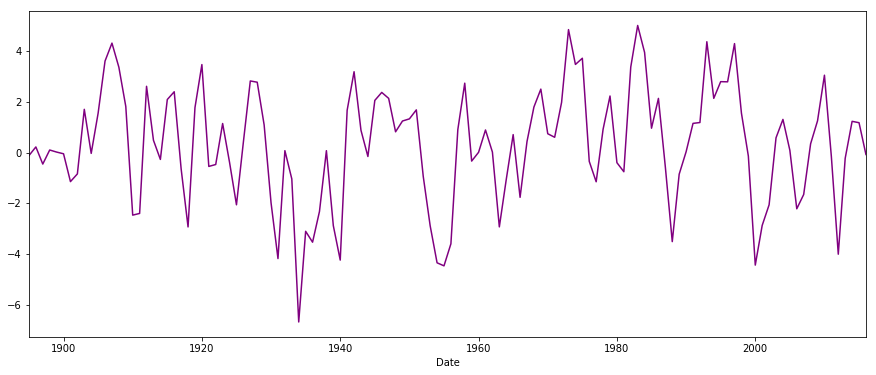

In [138]:
#PDSI
ax = df.groupby(by=df.index.year)['PDSI'].mean().plot(figsize =(15, 6), c='purple')

#I found that slightly... Am I like, failing the environmental movement?

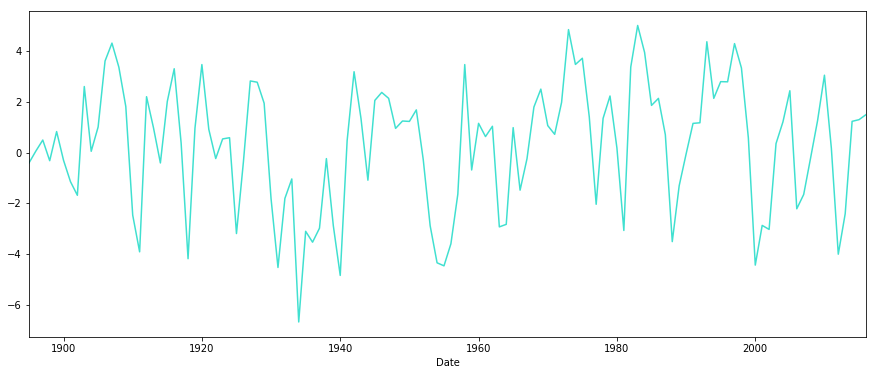

In [137]:
#PHDI
ax = df.groupby(by=df.index.year)['PHDI'].mean().plot(figsize =(15, 6),c='turquoise')



# Making comparisons

There are datasets for **five** other states. Please compare them in some way, building me a graphic. Even though we did it the other day, you do **not** need to combine them into one dataframe.

Some basic ideas:

- Graph their average temperatures over the year so we can see which one is the hottest
- Graph the difference between the highs/lows over the year so we can see which has the hottest temperature swings
- Graph their propensity to drought, highlighting the most drough-ridden state in a different color

In [ ]:
#Okay its too late.